<a href="https://colab.research.google.com/github/priyanshu7466/Python/blob/main/Deep_Learning/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [25]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.cifar10.load_data()

In [26]:
len(X_train)

50000

In [27]:
len(X_test)

10000

In [28]:
X_train.shape

(50000, 32, 32, 3)

In [29]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [30]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [31]:
y_test = y_test.reshape(-1,)

In [32]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [33]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,1))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

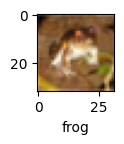

In [34]:
plot_sample(X_train,y_train,0)

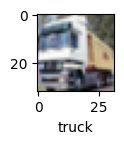

In [35]:
plot_sample(X_train,y_train,1)

In [36]:
X_train = X_train/255
y_train = y_train/255

In [37]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0030 - accuracy: 0.0999
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 3.1169e-04 - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9894e-04 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4913e-04 - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2028e-04 - accuracy: 0.1000


In [38]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 5089.6152 - accuracy: 0.1000


[5089.615234375, 0.10000000149011612]

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_class = [np.argmax(i) for i in y_pred]

print(classification_report(y_test,y_pred_class))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0046 - accuracy: 0.0999
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 4.0512e-08 - accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1183e-08 - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 6.5174e-09 - accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4794e-09 - accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2087e-09 - accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 4.3630e-10 - accuracy: 0.1000
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1696e-10 - accuracy: 0.1000
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2398e-10 - accuracy: 0.1000
Epoch 10/10
1563/1563 [===========================

In [41]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 15851.5010 - accuracy: 0.1000


[15851.5009765625, 0.10000000149011612]

In [42]:
y_pred = cnn.predict(X_test)
y_class = [np.argmax(i) for i in y_pred]
y_class[:5]

313/313 [==============================] - 1s 2ms/step


[0, 0, 0, 0, 0]

In [43]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

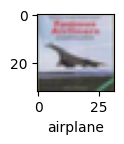

In [44]:
plot_sample(X_test,y_test,3)

# Exercise

In [45]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [46]:
len(X_train)

60000

In [47]:
len(X_test)

10000

In [48]:
X_train.shape

(60000, 28, 28)

In [50]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.1588 - accuracy: 0.4918
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8780 - accuracy: 0.7083
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6956 - accuracy: 0.7596
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5653 - accuracy: 0.8102
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4422 - accuracy: 0.8715
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3667 - accuracy: 0.8986
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3346 - accuracy: 0.9088
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3067 - accuracy: 0.9181
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2951 - accuracy: 0.9207
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.291

In [51]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.3106 - accuracy: 0.9205


[0.3105672001838684, 0.9204999804496765]

In [53]:
y_pred = ann.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:5]

313/313 [==============================] - 0s 1ms/step


[0, 2, 1, 0, 0]

In [54]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [57]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=28, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1192 - accuracy: 0.2030
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7772 - accuracy: 0.7406
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1341 - accuracy: 0.9614
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0900 - accuracy: 0.9740
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0755 - accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0616 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0521 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0437 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0401 - accuracy: 0.9878
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.036

In [58]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1319 - accuracy: 0.9728


[0.13193081319332123, 0.9728000164031982]

In [59]:
y_pred = cnn.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


[7, 2, 1, 0, 4]

In [60]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)